<a href="https://colab.research.google.com/github/tkeldenich/Predicting-Effective-Arguments/blob/main/EDA_on_NLP_How_to_Do_It.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on NLP How to Do It ? – Best Tutorial Simple**

- [English Article](https://inside-machinelearning.com/en/eda-nlp/)
- [French Article](https://inside-machinelearning.com/eda-sur-nlp/)

Today, let’s see together how to apply Exploratory Data Analysis (EDA) on a NLP dataset: feedback-prize-effectiveness.

In a previous article we saw how to do EDA to [prevent environmental disasters.](https://inside-machinelearning.com/en/data-science-and-environment/) Thanks to meteorological data, we analyzed [the causes of forest fires.](https://inside-machinelearning.com/en/data-science-and-environment/)

**Here I propose to apply the same analysis on text data thanks to the** [feedback-prize-effectiveness](https://github.com/tkeldenich/Predicting-Effective-Arguments) **dataset.**

This dataset is taken from the Kaggle competition of the same name: [Feedback Prize – Predicting Effective Arguments.](https://www.kaggle.com/competitions/feedback-prize-effectiveness/overview)

The main objective of this competition is to create a Machine Learning algorithm able to predict the effectiveness of a discourse. Here we will see in detail the Exploratory Data Analysis (EDA) that will allow us to understand our dataset.

## **Data**

First thing to do, download the dataset. Either by registering to the [Kaggle](https://www.kaggle.com/competitions/feedback-prize-effectiveness/overview) contest, or by downloading it on [this Github.](https://github.com/tkeldenich/Predicting-Effective-Arguments)

Then you can open it with Pandas and display dimensions:

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
df.shape

(36765, 5)

We have 36.765 rows so 36.765 discourses for 5 columns.

Now let’s see what these columns represent by displaying their types:

In [ ]:
df.dtypes

discourse_id               object
essay_id                   object
discourse_text             object
discourse_type             object
discourse_effectiveness    object
dtype: object

I display here the columns and their description:

- `discourse_id` – object – discourse ID
- `essay_id` – object – ID of the essay (an essay can be composed of several discourses)
- `discourse_text` – object – Discourse text
- `discourse_type` – object – Type of discourse
- `discourse_effectiveness` – object – Effectiveness of the discourse

2 ID columns, one column representing text and 2 columns for Labels. The one we are most interested in is `discourse_effectiveness` as it is the target to predict.

Then we can display our data:

In [ ]:
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


Now that we have a good overview of the dataset, we can start EDA!

**To do this, we’ll go through the classic steps of the process:**

- Understand our dataset with the **Univariate Analysis**
- Drawing hypotheses with the **Multivariate Analysis**

## **Univariate Analysis**

Univariate analysis is the fact of examining each feature separately.

This will allow us to get a deeper understanding of the dataset.

> Here, we are in the comprehension phase.

**The question associated with the Univariate Analysis is: What is the characteristics of the data that compose our dataset?**



### **Target**

As we noticed above, the most interesting column for us is the target `discourse_effectiveness`. This column indicates the effectiveness of a discourse.

Each line, each discourse, can have a different effectiveness. We classify them according to 3 levels:

- `Ineffective`
- `Adequate`
- `Effective`

Let’s see how these 3 classes are distributed in our dataset:

Adequate       0.570570
Effective      0.253665
Ineffective    0.175765
Name: discourse_effectiveness, dtype: float64


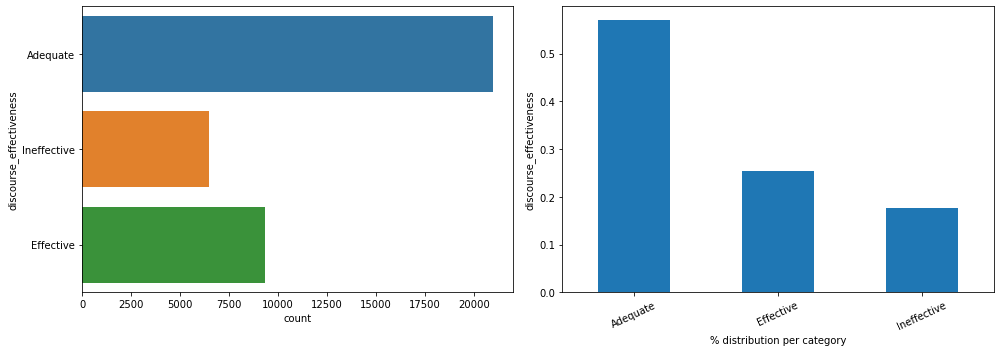

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

stats_target = df['discourse_effectiveness'].value_counts(normalize=True)
print(stats_target)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df,y='discourse_effectiveness')
plt.subplot(1,2,2)
stats_target.plot.bar(rot=25)
plt.ylabel('discourse_effectiveness')
plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

**Here you can see the numerical distribution, but also the statistical one which is easier to analyze.**

57% of the discourses are `Adequate`, the rest are either `Effective` or `Ineffective`.

Ideally, we would have needed more `Ineffective` discourses to have a better balanced and therefore generalizable dataset. Since we have no influence on the data, let’s continue with what we have!

### **Categorical Data**

Now I propose to analyze the types of discourses.

There are seven types:

- **Lead** – an introduction that begins with a statistic, quote, description, or other means of getting the reader’s attention and directing them to the thesis
- **Position** – an opinion or conclusion on the main issue
- **Claim** – a statement that supports the position
**Counterclaim** – a claim that refutes another claim or gives a reason opposite to the position
- **Rebuttal** – a statement that refutes a counterclaim
- **Evidence** – ideas or examples that support assertions, counterclaims or rebuttals
- **Concluding Statement** – a final statement that reaffirms the claims

Given the different types, it would seem logical that there are fewer `Counterclaims` and `Rebuttal` than other types.

**Furthermore, I would like to remind here that multiple discourses, multiple lines, can be part of the same essay (`essay_id`). That is, multiple discourses can be written by the same author, in the same context. And so an `essay` can contain multiple `discourse` having different types as well as different degrees of effectiveness.**

Let us now analyze the distribution of this `discourse_type`:



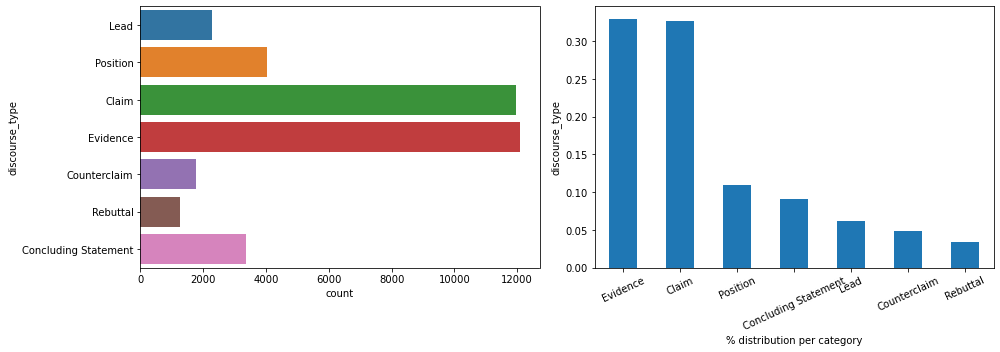

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df,y='discourse_type')
plt.subplot(1,2,2)
df['discourse_type'].value_counts(normalize=True).plot.bar(rot=25)
plt.ylabel('discourse_type')
plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

We can see here that the distribution is not equally distributed. Our hypothesis is verified for `Counterclaim` and `Rebuttal`. Nevertheless, the distribution is extremely unbalanced in favor of `Claim` and `Evidence`. Let’s keep that in mind for further analysis.

### **NLP Data**

#### **Discourse Length**

Now that we have analyzed the categorical data. We can move on to analyze the NLP data.

First, let’s analyze the length of our sentences.

To do this, we create a new column `discourse_length` containing the size of each discourse:

In [ ]:
def length_disc(discourse_text):
    return len(discourse_text.split())

df['discourse_length'] = df['discourse_text'].apply(length_disc)

Let’s display the result:

In [ ]:
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,discourse_length
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,41
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,21
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,72
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,18


Now we can examine the `discourse_length` column like any other numeric data:

/Users/tomkeldenich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


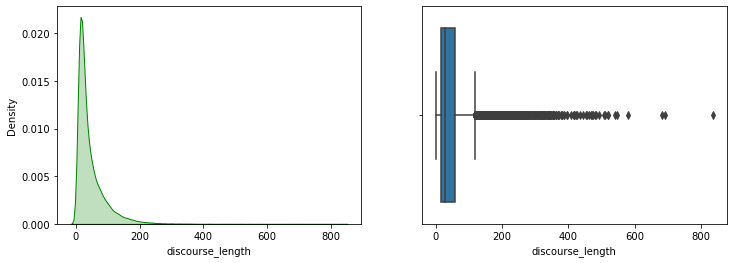

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['discourse_length'],color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df['discourse_length'])
plt.show()

t looks like there are a lot of values that are extremely far from the mean. These are called outliers and they impact our analysis. We can’t properly breakdown the Tukey box on the right.

**Let’s zoom in on the graph:**

/Users/tomkeldenich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


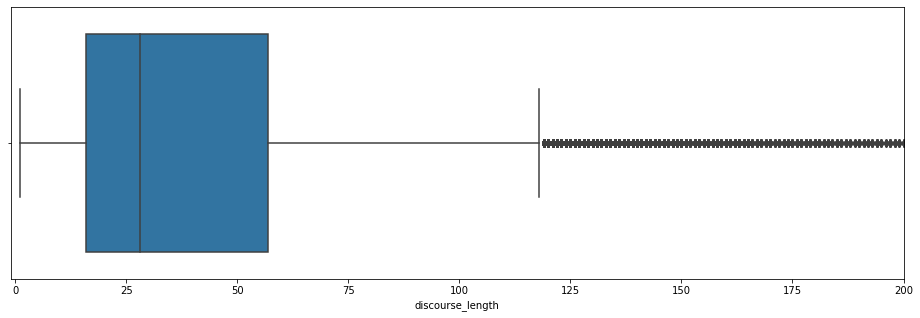

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.boxplot(df['discourse_length'])
ax.set_xlim(-1, 200)
plt.show()

That’s better! Most discourses are less than 120 words long, with the average being about 30 words.

**Despite this, it seems that there are many discourses above 120 words. Let’s analyze these outliers.**

First, by calculating [Skewness and Kurtosis.](https://inside-machinelearning.com/en/skewness-and-kurtosis/) Two measures, [detailed in this article](https://inside-machinelearning.com/en/skewness-and-kurtosis/), that help us to understand outliers and their distribution:

In [ ]:
print("Skew: {}".format(df['discourse_length'].skew()))
print("Kurtosis: {}".format(df['discourse_length'].kurtosis()))

Skew: 2.9285198590138415
Kurtosis: 15.61832354148293


The outliers are widely spaced from the average with a very high Kurtosis.

##### **Outliers**

In most distributions, it is normal to have extreme values.

**But outliers are not very frequent, even anomalous. It can be an error in the dataset.**

Therefore, let’s display these outliers to determine if it is an error.

To determine outliers, we use the z-score.

> Z-score calculates the distance of a point from the mean.

**If the z-score is less than -3 or greater than 3, it is considered an outlier.**

Let’s see this by displaying all points below -3 and above 3:

In [ ]:
from scipy.stats import zscore

y_outliers = df[abs(zscore(df['discourse_length'])) >= 3 ]
y_outliers

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,discourse_length
99,4a7d11406893,01E9D9CD5CBF,The study the ability of humans to read subatl...,Evidence,Ineffective,222
110,d1c5f0d13151,021663FD2F2E,The Mona lisa demonstration really intended to...,Evidence,Ineffective,209
208,4b1e4c493bfd,0491C7BFA9B4,Attention !!! to all the residents of this com...,Evidence,Ineffective,353
219,1b263824b0b2,04B4209D8A34,Even if you have no experience with an of the ...,Evidence,Effective,199
293,506f1d68d554,071BF63AF332,ubs and sports are very social activities. If ...,Evidence,Effective,249
...,...,...,...,...,...,...
36577,5c7052b1ac08,F359E262A14A,That is so important for me and my parents and...,Evidence,Ineffective,234
36620,e6613c2ffde8,F54BD89B665A,Online courses do not give the opportunity for...,Evidence,Effective,192
36654,b1f96b34280e,F93D06BC99D8,Generic_Name found out much later that she mad...,Concluding Statement,Effective,257
36689,479fb02ae14b,FD05FDCEA11B,My footsteps seemed impossibly loud as I walke...,Lead,Effective,542


719 lines are outliers. They do not seem to represent errors. We can consider these lines as discourses that have not been separated in multiple essays (to be checked).

Let’s display the distribution of the efficiency of these outliers:

Effective      0.536857
Ineffective    0.342142
Adequate       0.121001
Name: discourse_effectiveness, dtype: float64


<AxesSubplot:>

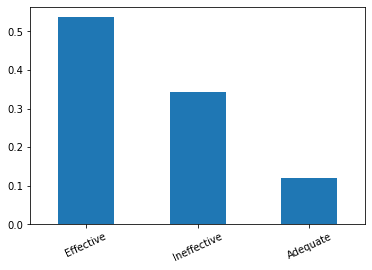

In [ ]:
stats_long_text = y_outliers['discourse_effectiveness'].value_counts(normalize=True)
print(stats_long_text)
stats_long_text.plot.bar(rot=25)

Here, a first hint emerges. Most long discourses seem to be `Effective` at about 53%. This is much more than in the whole dataset (25%).

We can therefore formulate a first hypothesis: **the longer a discourse is, the more `Effective` it seems.**

But we can also see that it can be more frequently `Ineffective` (34%) than a discourse of normal length (17%).

Let us display the distribution of types for these outliers:

Evidence                0.933241
Concluding Statement    0.034771
Lead                    0.029207
Counterclaim            0.001391
Rebuttal                0.001391
Name: discourse_type, dtype: float64


<AxesSubplot:>

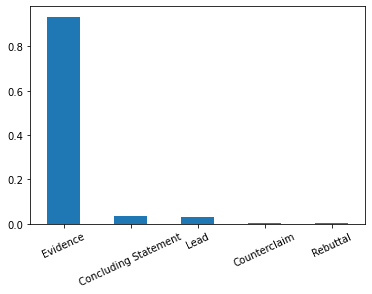

In [ ]:
stats_long_text = y_outliers['discourse_type'].value_counts(normalize=True)
print(stats_long_text)
stats_long_text.plot.bar(rot=25)

On this point, the statistic is very clear. Most long discourses are `Evidence`.

But are most `Evidence` discourses `Effective`?

We will see this in the Multivariate Analysis.

For now, let’s continue with the analysis of the words that make up the discourses!

#### **Preprocessing**

In order to analyze the words that compose the discourses, we will first perform a preprocessing by removing:

- numbers
- stopwords
- special characters

Here I copy and paste the code from the [Preprocessing NLP – Tutorial to quickly clean up a text](https://inside-machinelearning.com/en/preprocessing-nlp-preprocessing/) and applying a few changes:

In [ ]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

def preprocessSentence(sentence):
    sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

    sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

    tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

    words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

    words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)
    
    words_lemmatize = (re.sub(r"[^a-zA-Z0-9]","",w) for w in words_lemmatize)

    sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

    return sentence_clean.split()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomkeldenich/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomkeldenich/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/tomkeldenich/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomkeldenich/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


As an example let’s display a base sentence and a preprocessed one:

In [ ]:
print(df.iloc[1]['discourse_text'])
print('\n')
print(preprocessSentence(df.iloc[1]['discourse_text']))

On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform 


['perspective', 'think', 'face', 'natural', 'dont', 'think', 'life', 'mar', 'next', 'paragraph', 'ill', 'talking', 'think', 'natural']


Now let’s apply the preprocessing to the whole DataFrame:

In [ ]:
df_words = df['discourse_text'].apply(preprocessSentence)

We get the result in `df_words`.

#### **Word Analysis**

We now have a DataFrame containing our preprocessed discourses. Each line represents a list containing the words composing discourses.

I would like to perform a one-hot encoding here. Again the process is explained in our article on [NLP Preprocessing.](https://inside-machinelearning.com/en/preprocessing-nlp-preprocessing/)

**The idea of one-hot encoding is to have columns representing every words in the dataset, and rows indicating 1 if the word is present in the discourse, 0 otherwise.**

If you have enough memory space use this line to make the one-hot encoding:

In [ ]:
#dfa = pd.get_dummies(df_words.apply(pd.Series).stack()).sum(level=0)

**Otherwise use the `concat` option by splitting your dataset in two(or more) and one hot encoding the parts separately.**

Finish by concatenating them:

In [ ]:
dfa1 = pd.get_dummies(df_words.iloc[:20000].apply(pd.Series).stack()).sum(level=0)

/var/folders/bm/5ssydkrd4c1cpc7_7mjf7ym40000gn/T/ipykernel_1783/227132595.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfa1 = pd.get_dummies(df_words.iloc[:20000].apply(pd.Series).stack()).sum(level=0)


In [ ]:
dfa2 = pd.get_dummies(df_words.iloc[20000:].apply(pd.Series).stack()).sum(level=0)

/var/folders/bm/5ssydkrd4c1cpc7_7mjf7ym40000gn/T/ipykernel_1783/1417337473.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfa2 = pd.get_dummies(df_words.iloc[20000:].apply(pd.Series).stack()).sum(level=0)


In [ ]:
dfb = pd.concat([dfa1,dfa2], axis=0, ignore_index=True)

In [ ]:
dfb.head()

,a,aa,abandon,abandoned,abhor,ability,able,aboard,abolish,abolishment,...,wrestle,wristband,writhen,wrongful,yah,yell,yote,youthfulness,zipping,zoom
0,0.0,0,0,0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,0,0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0,0,0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0,0,0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0,0,0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you have used the `concat` option, you need now to replace the NaN with 0:

In [ ]:
dfb = dfb.fillna(0).astype(int)

We display the result:

In [ ]:
dfb.head()

,a,aa,abandon,abandoned,abhor,ability,able,aboard,abolish,abolishment,...,wrestle,wristband,writhen,wrongful,yah,yell,yote,youthfulness,zipping,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset is now one hot encoded!

This will allow us to count the number of occurrences of each word more easily:

In [ ]:
words_sum = dfb.sum(axis = 0).T

In [ ]:
words_sum.head()

a            2
aa           3
abandon      3
abandoned    6
abhor        1
dtype: int64

The `words_sum` DataFrame contains the number of times each word appears.

**It is now sorted alphabetically from A to Z but I’d like to analyze the words that appear the most often.**

So let’s sort `words_sum` by decreasing order of occurrence:

In [ ]:
words_sum = words_sum.sort_values(ascending=False)

Now let’s display the words that appear most often in our dataset:

<AxesSubplot:>

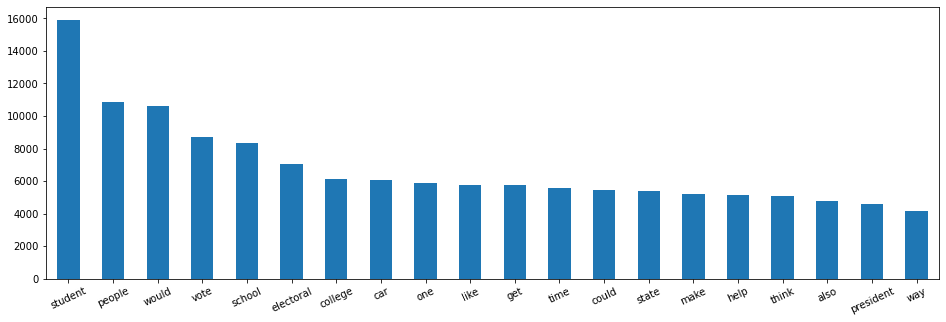

In [ ]:
words_sum_max = words_sum.head(20)

plt.figure(figsize=(16,5))
words_sum_max.plot.bar(rot=25)

These words refer to school and elections. At this point, we can’t say much about these words.

It is interesting to display them now in order to compare them later during the Multivariate Analysis.

Indeed, the most frequent words in the global dataset may not be the same as in the `Effective` discourse.

## **Multivariate Analysis**

We now have a much more accurate view of our dataset by analyzing:

- Effectiveness (target)
- Discourse types
- Length of the discourses
- Words that make up discourses

Let’s move on to the Multivariate Analysis.

Multivariate Analysis is the examination of our features by putting them in relation with our target.

This will allow us to make hypotheses about the dataset.

> Here we are in the theorization phase.

**The question associated with Multivariate Analysis is: Is there a link between our features and the target?**

### **Categorical Data**

First, let’s start with the categorical data.

Is there a relationship between discourse types (`discourse_type`) and their effectiveness (`discourse_effectiveness`)?

We display the number of occurrences of each of these types as a function of effectiveness:

<Figure size 576x576 with 0 Axes>

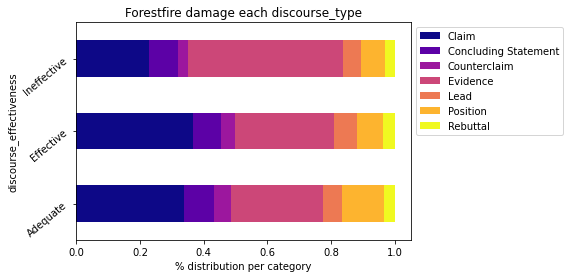

In [ ]:
import numpy as np

plt.figure(figsize=(8,8))
cross = pd.crosstab(index=df['discourse_effectiveness'],columns=df['discourse_type'],normalize='index')
cross.plot.barh(stacked=True,rot=40,cmap='plasma').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('% distribution per category')
plt.xticks(np.arange(0,1.1,0.2))
plt.title("Forestfire damage each {}".format('discourse_type'))
plt.show()

In [ ]:
cross

discourse_type,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
discourse_effectiveness,,,,,,,
Adequate,0.338323,0.092721,0.054822,0.289079,0.059303,0.132717,0.033036
Effective,0.365108,0.088462,0.044821,0.309350,0.073236,0.082565,0.036457
Ineffective,0.228258,0.089910,0.031724,0.488394,0.056329,0.072733,0.032652


Impressive! At first glance, one can see that the more a discourse is of `Claim` type, the more `Effective` it is.

But is this really the case?

If we go back to our Univariate Analysis, we can see that `Claim` and `Evidence` are overrepresented types in our dataset. It is therefore logical to see them overrepresented in this analysis.

In fact, it would be more logical to evaluate this distribution in a statistical way. Thus all `discourse_type` would have the same weight in the dataset and the analysis would not be biased.

For example we have only 2.291 `Lead` against 12.105 `Evidence`. So there will be more `Evidence` in our analysis. This creates an imbalance. For `Effective`, we have 2,885 `Evidence` and 683 `Lead`. Does this mean that an `Evidence` discourse is more effective than a Lead discourse?

To clarify this, we need to perform a normalized analysis.



#### **Normalization**

To give the same weight to each `discourse_type` in the dataset, we need to normalize their occurrences.

We start by taking the number of occurrences of each `discourse_type` according to the `discourse_effectiveness`:

In [ ]:
cross_norm = pd.crosstab(index=df['discourse_effectiveness'],columns=df['discourse_type'])

In [ ]:
cross_norm

discourse_type,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
discourse_effectiveness,,,,,,,
Adequate,7097,1945,1150,6064,1244,2784,693
Effective,3405,825,418,2885,683,770,340
Ineffective,1475,581,205,3156,364,470,211


Then we count the total number of occurrences of each `discourse_type`:

In [ ]:
count_type = df['discourse_type'].value_counts()

And finally we can normalize each of the occurrences according to the efficiency. We divide by the total number of occurrences of the type and multiple by the same number (1000):

In [ ]:
cross_norm['Claim'] = (cross_norm['Claim']/count_type['Claim'])*1000
cross_norm['Concluding Statement'] = (cross_norm['Concluding Statement']/count_type['Concluding Statement'])*1000
cross_norm['Counterclaim'] = (cross_norm['Counterclaim']/count_type['Counterclaim'])*1000
cross_norm['Evidence'] = (cross_norm['Evidence']/count_type['Evidence'])*1000
cross_norm['Lead'] = (cross_norm['Lead']/count_type['Lead'])*1000
cross_norm['Position'] = (cross_norm['Position']/count_type['Position'])*1000
cross_norm['Rebuttal'] = (cross_norm['Rebuttal']/count_type['Rebuttal'])*1000

In [ ]:
cross_norm

discourse_type,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
discourse_effectiveness,,,,,,,
Adequate,592.552392,580.423754,648.618161,500.950021,542.994326,691.848907,557.073955
Effective,284.294899,246.195166,235.758601,238.331268,298.123090,191.351889,273.311897
Ineffective,123.152709,173.381080,115.623237,260.718711,158.882584,116.799205,169.614148


We now have normalized occurrences. All we need to do now is to create statistics.

For each efficiency, we sum the total number of normalized occurrences:

In [ ]:
cross_normSum = cross_norm.sum(axis=1)
print(cross_normSum)

discourse_effectiveness
Adequate       4114.461515
Effective      1767.366810
Ineffective    1118.171675
dtype: float64


Then we use this sum to create our statistics:

In [ ]:
cross_norm.loc['Adequate'] = cross_norm.loc['Adequate']/cross_normSum['Adequate']
cross_norm.loc['Effective'] = cross_norm.loc['Effective']/cross_normSum['Effective']
cross_norm.loc['Ineffective'] = cross_norm.loc['Ineffective']/cross_normSum['Ineffective']

In [ ]:
cross_norm

discourse_type,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
discourse_effectiveness,,,,,,,
Adequate,0.144017,0.141069,0.157644,0.121753,0.131972,0.168151,0.135394
Effective,0.160858,0.139301,0.133395,0.134851,0.168682,0.108269,0.154644
Ineffective,0.110138,0.155058,0.103404,0.233165,0.142091,0.104456,0.151689


When this is done, we display the normalized distribution of each of the types according to the efficiency:

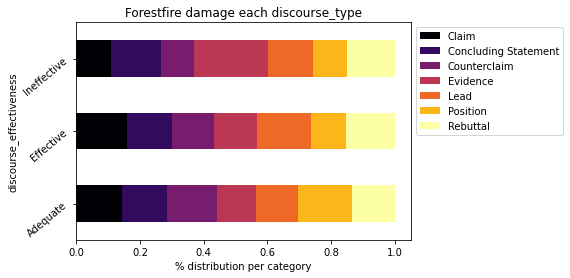

In [ ]:
cross_norm.plot.barh(stacked=True,rot=40,cmap='inferno').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('% distribution per category')
plt.xticks(np.arange(0,1.1,0.2))
plt.title("Forestfire damage each {}".format('discourse_type'))
plt.show()

This is much better and more logical!

Most types don’t seem to affect the effectiveness of the discourse.

**Most?**

**It seems that some stand out more than others.**

##### **Max occurence – discourse_type**

Let’s display the max values for each of the discourse_effectiveness:

For `Ineffective`:

In [ ]:
cross_norm.columns[(cross_norm == cross_norm.loc['Ineffective'].max()).any()].tolist()

['Evidence']

For `Adequate`:

In [ ]:
cross_norm.columns[(cross_norm == cross_norm.loc['Adequate'].max()).any()].tolist()

['Position']

For `Effective`:

In [ ]:
cross_norm.columns[(cross_norm == cross_norm.loc['Effective'].max()).any()].tolist()

['Lead']

In the Univariate Analysis, we saw that most of the long discourses are `Effective` and `Evidence` type.

We could have established a link between an `Evidence` type discourse and an `Effective` type discourse. But as we see here, the two are not correlated.

Indeed, most `Evidence` type discourses are `Ineffective`, while `Position` types are `Adequate` and `Lead` types are `Effective`.

Normalization is mandatory here to understand the data properly. If we had not done so, we would have come to the conclusion that `Claim` type discourse is the most useful for `Adequate` and `Effective` discourse. This is not true. This bias is due to the lack of data in our dataset (the lack of generalization).

Most of our data are of type `Evidence`(12,105) and `Claim`(11,977) while only 2,291 rows are counted for type `Lead`.

Moreover, another bias may remain. Do we have enough data on `Lead` to draw a conclusion on this label?

For now, the contest has only one dataset, so let’s assume we do 😉

### **NLP Data**

#### **Discourse Length**

Let’s continue on the analysis of discourse length in relation to effectiveness:

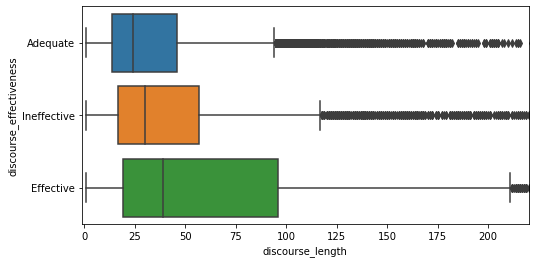

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='discourse_length', y='discourse_effectiveness').set_xlim(-1, 220)
plt.show()

The longer a discourse is, the more likely it is to be `Effective`. We can also display the average number of words in each category.

In [ ]:
df.groupby(['discourse_effectiveness'])['discourse_length'].median()

discourse_effectiveness
Adequate       24.0
Effective      39.0
Ineffective    30.0
Name: discourse_length, dtype: float64

#### **Words Analysis**

Finally, the analysis of words.

Do the words chosen have an impact on the effectiveness of a discourse? If so, we should find disparities in effectiveness.

We start by extracting the `discourse_effectiveness` column from the dataset and add it to `dfb`, the encoded one-hot discourses:

In [ ]:
dfb['discourse_effectiveness'] = df['discourse_effectiveness']

In [ ]:
dfb.head()

,a,aa,abandon,abandoned,abhor,ability,able,aboard,abolish,abolishment,...,wristband,writhen,wrongful,yah,yell,yote,youthfulness,zipping,zoom,discourse_effectiveness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adequate
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adequate
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adequate
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adequate
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adequate


We will separate this dataset into 3 DataFrame:

- `Effective`
- `Adequate`
- `Ineffective`

And analyze the words contained in each of them:

In [ ]:
dfb_ineffective = dfb.loc[dfb['discourse_effectiveness'] == 'Ineffective'].drop('discourse_effectiveness', axis=1)
dfb_adequate = dfb.loc[dfb['discourse_effectiveness'] == 'Adequate'].drop('discourse_effectiveness', axis=1)
dfb_effective = dfb.loc[dfb['discourse_effectiveness'] == 'Effective'].drop('discourse_effectiveness', axis=1)

As for the Univariate Analysis, we sum the occurrence of each word:

In [ ]:
words_sum_ineffective = dfb_ineffective.sum(axis = 0).T
words_sum_adequate = dfb_adequate.sum(axis = 0).T
words_sum_effective  = dfb_effective.sum(axis = 0).T

We sort them by descending order, the greatest number of occurrences first:



In [ ]:
words_sum_ineffective = words_sum_ineffective.sort_values(ascending=False)
words_sum_adequate = words_sum_adequate.sort_values(ascending=False)
words_sum_effective = words_sum_effective.sort_values(ascending=False)

And we take the first 20 occurrences:



In [ ]:
words_sum_ineffective_max = words_sum_ineffective.head(500)
words_sum_adequate_max = words_sum_adequate.head(500)
words_sum_effective_max = words_sum_effective.head(500)

We can display the graph for each of the DataFrame but here I prefer to group them in a single DataFrame and display the head.

This will allow us to compare more simply the occurrence of words according to the three types of effectiveness.

In [ ]:
pd.DataFrame(list(zip(list(words_sum_effective_max.index),
                      list(words_sum_adequate_max.index),
                      list(words_sum_ineffective_max.index))),
             columns =['Effective', 'Adequate', 'Ineffective']).head(30)

,Effective,Adequate,Ineffective
0,student,student,student
1,people,people,people
2,would,would,would
3,school,vote,vote
4,vote,school,electoral
5,one,electoral,school
6,get,college,car
7,time,car,college
8,help,like,state
9,make,get,like


It does not seem that there is a remarkable difference. Neither between the Labels, nor between the Labels and the global dataset.

**In fact, usually the difference lies in the following lines. The first ones being always shared on the whole dataset.**

Therefore, I invite you to display on your side the 100 or 500 most frequent words according to the `discourse_effectiveness` and tell us in comments your analysis 🔥

From my personal studies, I know that verbs appear more in effective discourse. Is this true in our dataset? If so, it may be a useful clue for us.

#### **Tags Analysis**

To study the occurrence of verbs, we use [NLTK tags.](https://inside-machinelearning.com/en/nltk-quickly-know-the-tag-and-their-meanings/)

NLTK is an NLP library that can analyze sentences and extract tags.

**For example it can identify nouns, verbs, adjectives, etc.**

Perfect for us!

Let’s take our words and their occurrences. We’ll create a new `word` column thanks to the indexes:

In [ ]:
words_sum_ineffective = words_sum_ineffective.to_frame()
words_sum_ineffective['word'] = words_sum_ineffective.index

words_sum_adequate = words_sum_adequate.to_frame()
words_sum_adequate['word'] = words_sum_adequate.index

words_sum_effective = words_sum_effective.to_frame()
words_sum_effective['word'] = words_sum_effective.index

We now have a column representing the number of occurrences and a column representing the word.

Let’s add a last column representing the tag thanks to the `pos_tag` function of `nltk.tag`:

In [ ]:
from nltk import tag
nltk.download('averaged_perceptron_tagger')

words_sum_ineffective['tag'] = [x[1] for x in tag.pos_tag(words_sum_ineffective['word'])]
words_sum_adequate['tag'] = [x[1] for x in tag.pos_tag(words_sum_adequate['word'])]
words_sum_effective['tag'] = [x[1] for x in tag.pos_tag(words_sum_effective['word'])]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tomkeldenich/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Tags are very detailed. For example there are 4 types of verbs (past, present, etc) which all have a different tag. This detail is not interesting for us. Therefore we clean these tags to keep only the essential (one tag by verb, one tag by adjective etc):

In [ ]:
def easyTag(x):
    if x.startswith('VB'):
        x = 'VB'
    elif x.startswith('JJ'):
        x = 'JJ'
    elif x.startswith('RB'):
        x = 'RB'
    elif x.startswith('NN'):
        x = 'NN'
        
    return x

words_sum_ineffective['tag'] = words_sum_ineffective['tag'].apply(lambda x: easyTag(x))
words_sum_adequate['tag'] = words_sum_adequate['tag'].apply(lambda x: easyTag(x))
words_sum_effective['tag'] = words_sum_effective['tag'].apply(lambda x: easyTag(x))

In [ ]:
words_sum_ineffective.head(10)

,0,word,tag
student,2503,student,NN
people,1865,people,NN
would,1749,would,MD
vote,1532,vote,VB
electoral,1301,electoral,JJ
school,1258,school,NN
car,1143,car,NN
college,1135,college,NN
state,1052,state,NN
like,1042,like,IN



We now have a DataFrame with our tag column:

- NN for nouns
- VB for verbs
- JJ for adjectives
- RB for adverbs
- … (you can consult the rest of the Tags on [our article dedicated to the subject](https://inside-machinelearning.com/en/nltk-quickly-know-the-tag-and-their-meanings/))

Finally, we count the number of occurrences per Tag:

In [ ]:
def count_tag(words_sum):
    tag_count = []
    for x in words_sum['tag'].unique():
        tmp = []
        tmp.append(x)
        tmp.append(words_sum[words_sum['tag'] == x][0].sum())
        tag_count.append(tmp)
    return pd.DataFrame(tag_count, columns= ['tag','count'])

tag_ineffective = count_tag(words_sum_ineffective).sort_values(by=['count'], ascending=False)
tag_adequate = count_tag(words_sum_adequate).sort_values(by=['count'], ascending=False)
tag_effective = count_tag(words_sum_effective).sort_values(by=['count'], ascending=False)

And we can display the result:

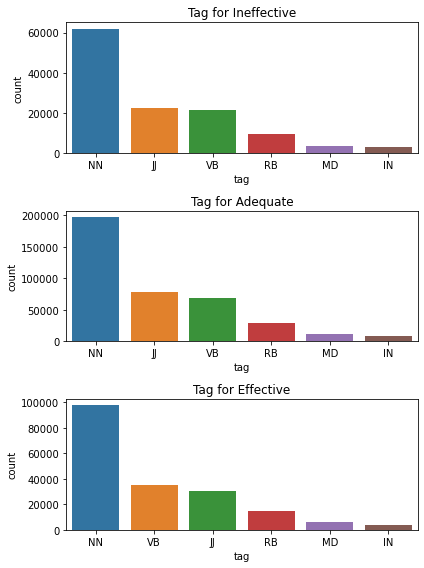

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(3,1,1)
sns.barplot(x="tag", y="count", data=tag_ineffective.iloc[:6])
plt.title('Tag for Ineffective')
plt.subplot(3,1,2)
sns.barplot(x="tag", y="count", data=tag_adequate.iloc[:6])
plt.title('Tag for Adequate')
plt.subplot(3,1,3)
sns.barplot(x="tag", y="count", data=tag_effective.iloc[:6])
plt.title('Tag for Effective')
plt.tight_layout()
plt.show()

Nouns appear most often in all types of discourse. This seems logical because they compose the majority of the sentences. However, this gives us little information.

Let’s analyze the rest of the tags by omitting the nouns:



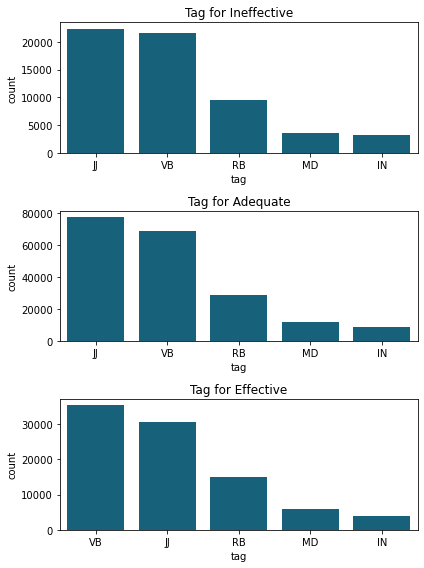

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(3,1,1)
sns.barplot(x="tag", y="count", data=tag_ineffective.iloc[1:6], color="#066b8b")
plt.title('Tag for Ineffective')
plt.subplot(3,1,2)
sns.barplot(x="tag", y="count", data=tag_adequate.iloc[1:6], color="#066b8b")
plt.title('Tag for Adequate')
plt.subplot(3,1,3)
sns.barplot(x="tag", y="count", data=tag_effective.iloc[1:6], color="#066b8b")
plt.title('Tag for Effective')
plt.tight_layout()
plt.show()

Here, the number of occurrences doesn’t matter. Since `Adequate` discourse has many more words, there will obviously be more words in each tag of this section.

Here we have to look at the tag ranking.

What we can see is that `Effective` discourse contains more verbs (VB) than the other types.

Our hypothesis seems to be confirmed!

Let’s go further by analyzing the number of verbs per speech according to the effectiveness.

#### **Average number of verbs by effectiveness**

This time we apply `pos_tag` on all our words preprocessed in `df_words`.

To recall this DataFrame contains one discourse per line with only the important words (without stopwords, special characters, etc). Using this DataFrame will facilitate tag counting:

In [ ]:
list_tags = []
for i in range(len(df_words)):
    list_tags.append([easyTag(x[1]) for x in tag.pos_tag(df_words[i])])

Then we count the number of verbs in each row:

In [ ]:
df_tag = pd.DataFrame(columns=['VB'])

for i in range(len(list_tags)):
    df_tag = df_tag.append({'VB': list_tags[i].count('VB')}, ignore_index=True)

We extract the `discourse_effectiveness` column and add it to df_tag:

In [ ]:
df_tag['discourse_effectiveness'] = df['discourse_effectiveness']

In [ ]:
df_tag.head()

Finally we display the average number of verbs per effectiveness.

For `Ineffective`:

In [ ]:
VB_ineffective = df_tag.loc[df_tag['discourse_effectiveness'] == 'Ineffective']
VB_ineffective['VB'].sum() / len(VB_ineffective)

For `Adequate`:

In [ ]:
VB_adequate = df_tag.loc[df_tag['discourse_effectiveness'] == 'Adequate']
VB_adequate['VB'].sum() / len(VB_adequate)

For `Effective`:

In [ ]:
VB_effective = df_tag.loc[df_tag['discourse_effectiveness'] == 'Effective']
VB_effective['VB'].sum() / len(VB_effective)

Dans un discours `Effective` on décompte 5 verbe moyens utilisés. C’est 2 de plus que dans un discours `Adequate` et 1 de plus que dans un discours `Ineffective`.

## **Conclusion**

To improve a discourse:
- Use about 39 words
- 5 verbs (but also adjectives)
- Have a Lead (a statistic, a quote, a description) in your discourse to grab the reader’s attention and direct them to the thesis.
- Avoid sharing ideas that support assertions, counter-affirmations, or rebuttals (most Evidence type discourses are ineffective).

To go further, there are many analyses that can be done. Questions that we haven’t answered. For example, we could study which words make up `Lead` vs. `Evidence` discourse.

Biases still remain, for example the average number of verbs is higher in `Effective` discourses but the average number of words is higher too. Is this a prerequisite to have an `Effective` discourse or is it simply a bias of the dataset?

We could analyze this dataset for days and list all the biases. But now that we have a first detailed and consistent analysis, the most important thing is to take action and use a Machine Learning model to achieve the main goal: classify the students’ discourses as “effective”, “adequate” or “ineffective”!

See you in a next post 😉